# 🎯 Project Idea: Predict Student Final Grade & Identify At-Risk Students -->

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\HP\Downloads\student+performance\student\student-mat.csv",sep=';')

### Exploratory Data Analysis

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
df.shape

(395, 33)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [18]:
numeric_cols = df.select_dtypes(include = 'number')
numeric_cols.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [20]:
categoric_cols = df.select_dtypes(include = 'object')
categoric_cols.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [25]:
categoric_cols.groupby('school')['sex'].value_counts()

school  sex
GP      F      183
        M      166
MS      F       25
        M       21
Name: count, dtype: int64

#### 1. Distribution of Final Grades (G3)

In [27]:
sns.set(style="whitegrid")

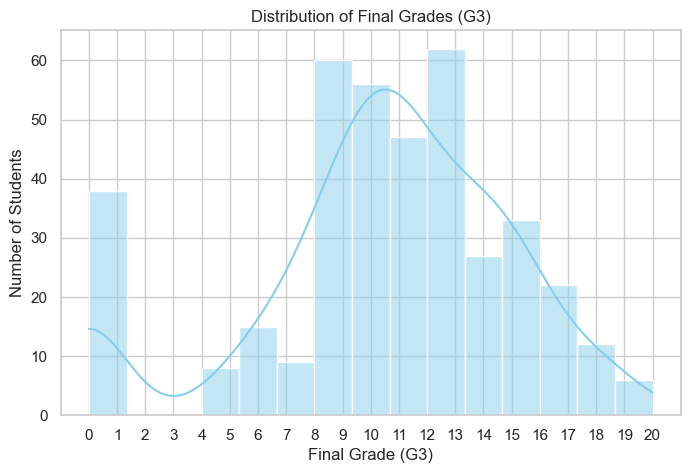

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['G3'],kde=True,bins=15,color='skyblue')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades (G3)')
plt.xticks(range(0, 21))
plt.show()


#### 2. Compare Categorical Features with G3

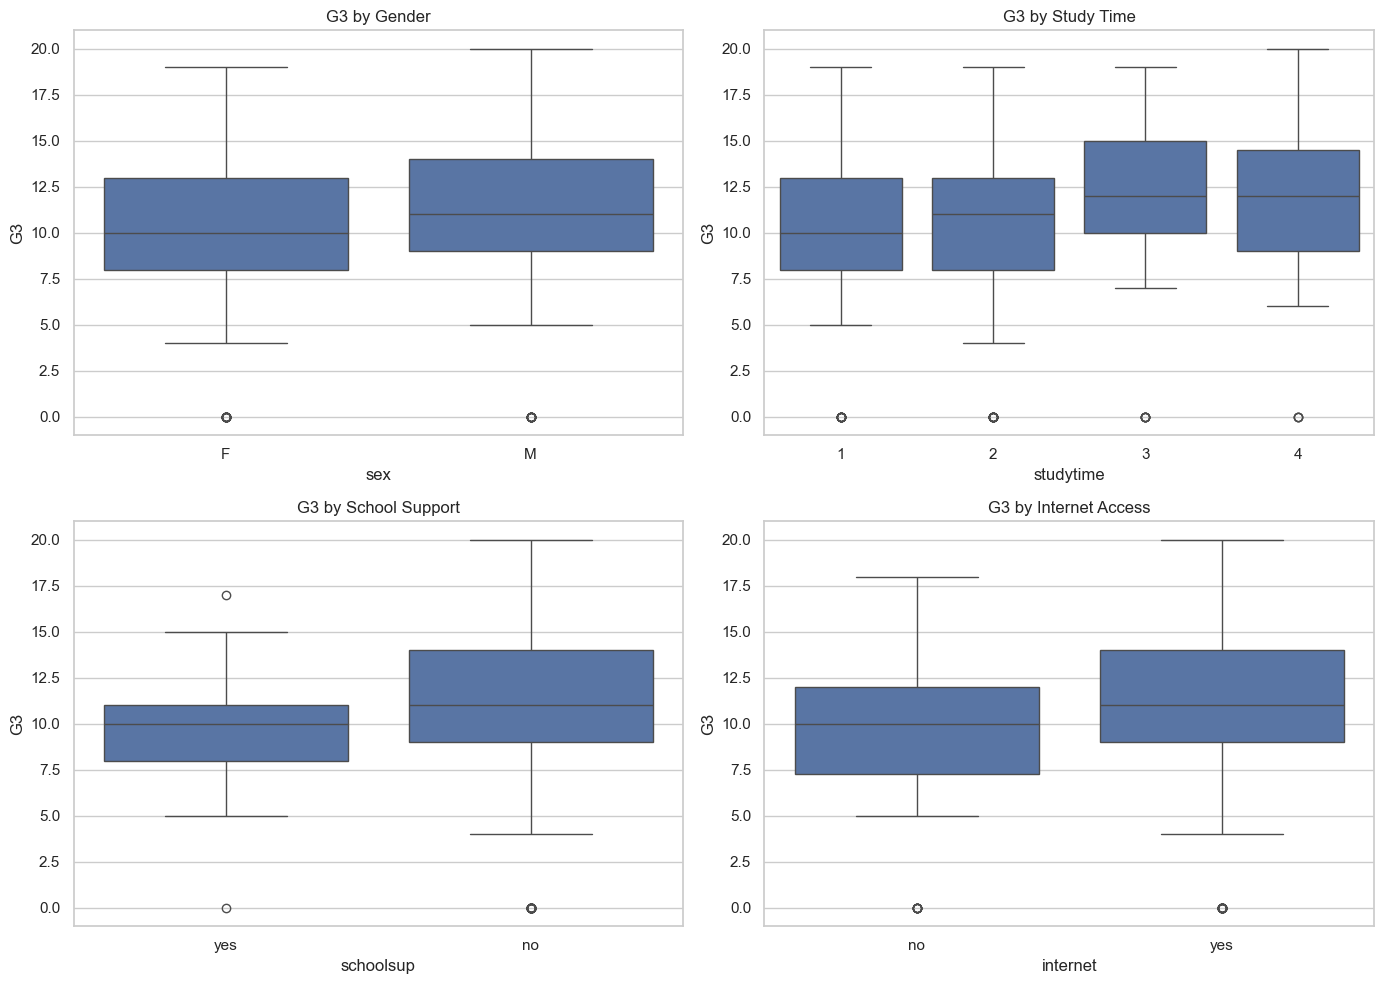

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Plot 1: G3 vs sex
sns.boxplot(x='sex', y='G3', data=df, ax=axes[0, 0])
axes[0, 0].set_title('G3 by Gender')

# Plot 2: G3 vs studytime
sns.boxplot(x='studytime', y='G3', data=df, ax=axes[0, 1])
axes[0, 1].set_title('G3 by Study Time')

# Plot 3: G3 vs schoolsup
sns.boxplot(x='schoolsup', y='G3', data=df, ax=axes[1, 0])
axes[1, 0].set_title('G3 by School Support')

# Plot 4: G3 vs internet
sns.boxplot(x='internet', y='G3', data=df, ax=axes[1, 1])
axes[1, 1].set_title('G3 by Internet Access')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### 3. Compare Numerical Features with G3


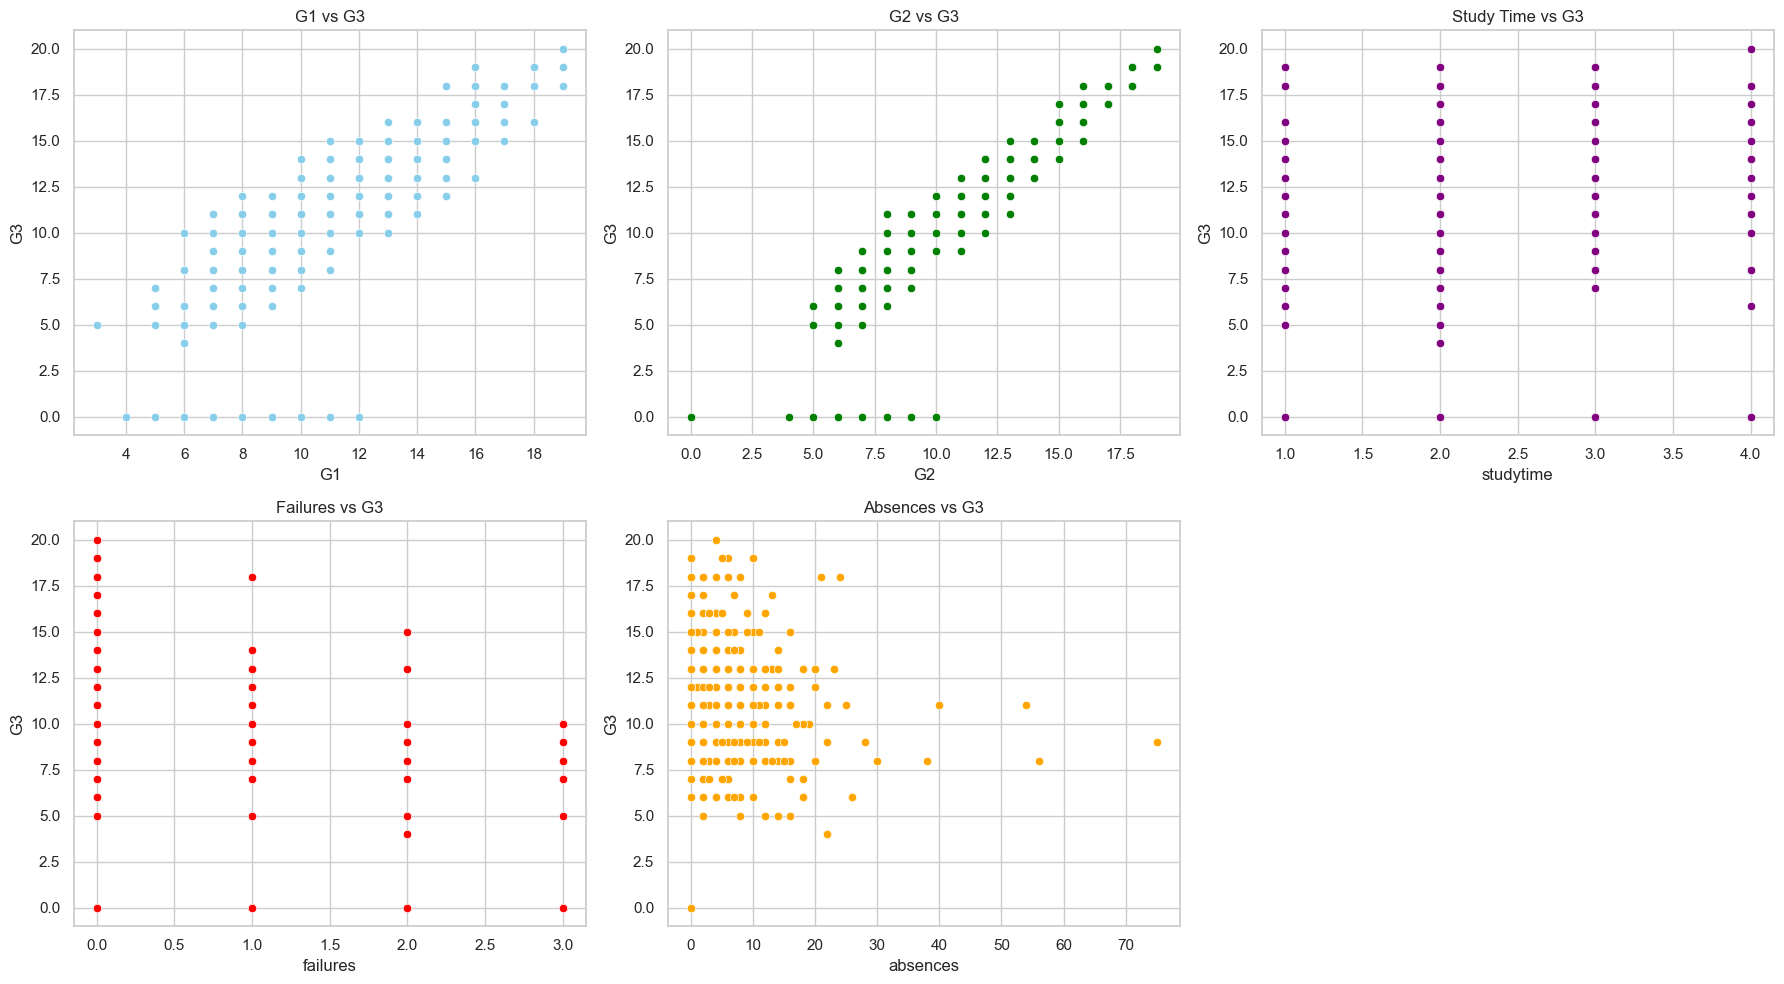

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create 2x3 grid for scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: G1 vs G3
sns.scatterplot(x='G1', y='G3', data=df, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('G1 vs G3')

# Plot 2: G2 vs G3
sns.scatterplot(x='G2', y='G3', data=df, ax=axes[0, 1], color='green')
axes[0, 1].set_title('G2 vs G3')

# Plot 3: studytime vs G3
sns.scatterplot(x='studytime', y='G3', data=df, ax=axes[0, 2], color='purple')
axes[0, 2].set_title('Study Time vs G3')

# Plot 4: failures vs G3
sns.scatterplot(x='failures', y='G3', data=df, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Failures vs G3')

# Plot 5: absences vs G3
sns.scatterplot(x='absences', y='G3', data=df, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Absences vs G3')

# Leave the last plot blank
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


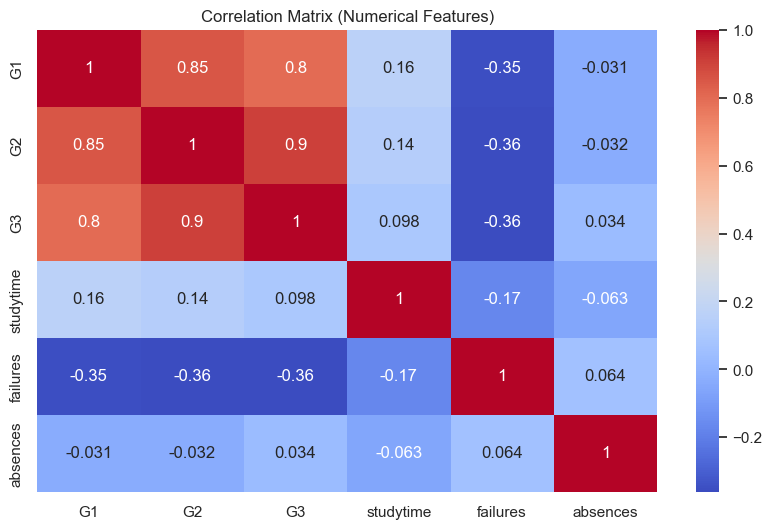

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()


In [36]:
# Assuming passing grade is >= 10
df['Passed'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

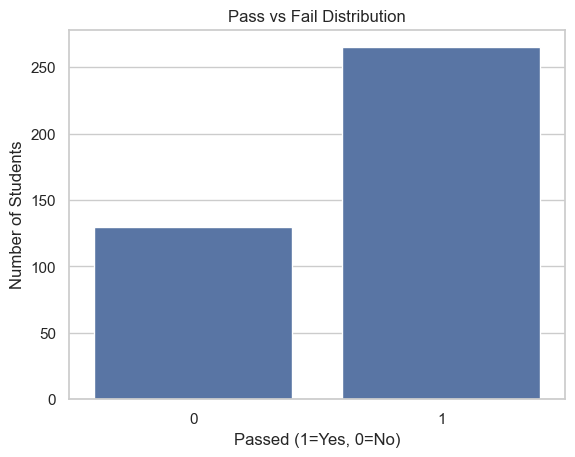

In [42]:
sns.countplot(x='Passed', data=df)
plt.title('Pass vs Fail Distribution')
plt.xlabel('Passed (1=Yes, 0=No)')
plt.ylabel('Number of Students')
plt.show()


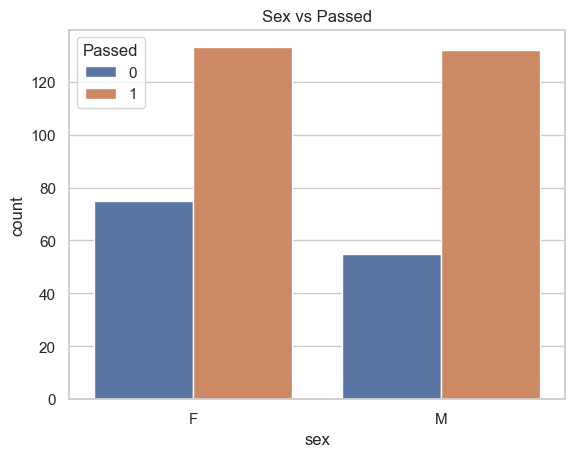

In [43]:
# Example: Compare sex distribution
sns.countplot(x='sex', hue='Passed', data=df)
plt.title('Sex vs Passed')
plt.show()


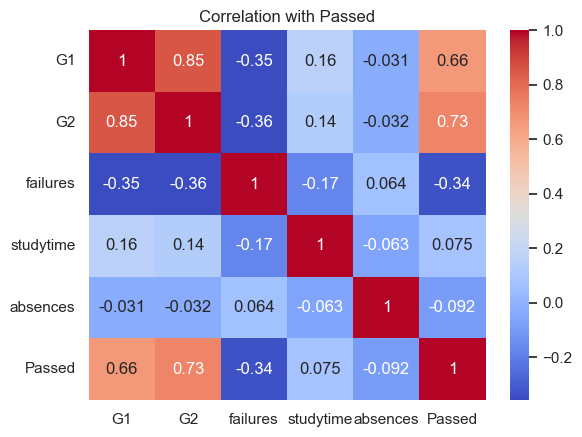

In [44]:
corr_df = df[['G1', 'G2', 'failures', 'studytime', 'absences', 'Passed']]
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation with Passed')
plt.show()


In [ ]:
# ✅ Final Recommended Features for Classification
# You should use a combination of:

# 🔹 Numeric:
# G1
# G2
# failures
# studytime

# 🔹 Categorical (after encoding):
# sex
# schoolsup
# internet
# romantic
# Mjob
# Fjob

#### ✅ Step 6: Feature Encoding & Preprocessing

In [45]:
features = ['G1', 'G2', 'failures', 'studytime', 'sex', 'schoolsup', 'internet', 'romantic', 'Mjob', 'Fjob']
target = 'Passed'

X = df[features]
y = df[target]

In [49]:
X

,G1,G2,failures,studytime,sex,schoolsup,internet,romantic,Mjob,Fjob
0,5,6,0,2,F,yes,no,no,at_home,teacher
1,5,5,0,2,F,no,yes,no,at_home,other
2,7,8,3,2,F,yes,yes,no,at_home,other
3,15,14,0,3,F,no,yes,yes,health,services
4,6,10,0,2,F,no,no,no,other,other
...,...,...,...,...,...,...,...,...,...,...
390,9,9,2,2,M,no,no,no,services,services
391,14,16,0,1,M,no,yes,no,services,services
392,10,8,3,1,M,no,no,no,other,other
393,11,12,0,1,M,no,yes,no,services,other


In [60]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [61]:
# Numeric and categorical features
numeric_features = ['G1', 'G2', 'failures', 'studytime']
binary_categorical = ['sex', 'schoolsup', 'internet', 'romantic']
multi_categorical = ['Mjob', 'Fjob']


In [63]:
num_transformer = StandardScaler()
binary_transformer= OrdinalEncoder()
multi_transformer= OneHotEncoder(drop='first',handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, numeric_features),
        ('bin', binary_transformer, binary_categorical),
        ('multi', multi_transformer, multi_categorical)
    ]
)

In [64]:
X = df[numeric_features + binary_categorical + multi_categorical]
y = df['Passed']


In [66]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['G1', 'G2', 'failures', 'studytime']),
                                ('bin', OrdinalEncoder(),
                                 ['sex', 'schoolsup', 'internet', 'romantic']),
                                ('multi',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Mjob', 'Fjob'])])

In [67]:
X.sample()

,G1,G2,failures,studytime,sex,schoolsup,internet,romantic,Mjob,Fjob
277,9,9,0,1,M,no,yes,no,teacher,services


In [68]:
y.sample()

203    0
Name: Passed, dtype: int64

#### ✅ Step 7: Train-Test Split & Model Training

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

## Now we do Classification because we have categorical target 

In [ ]:
# models

# Logisticregression
# KNN
# SVM
# DecisionTree
# Randomforest
# naive bayes
# gradient boosting

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.pipeline import Pipeline


In [73]:
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVC': SVC(kernel='rbf', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}


In [81]:
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

# Show results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
1,Decision Tree,0.915966
2,Random Forest,0.907563
0,Logistic Regression,0.890756
3,SVC,0.882353
4,KNN,0.823529


### Fine-Tuning the Best Model with GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}


In [83]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline setup
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [84]:
grid_search = GridSearchCV(rf_pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("🔍 Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-Validated Accuracy:", grid_search.best_score_)


🔍 Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
✅ Best Cross-Validated Accuracy: 0.9240909090909092


In [91]:
from sklearn.metrics import classification_report, confusion_matrix

# Use best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate
print("\n🏁 Test Accuracy:", accuracy_score(y_test, y_pred))


🏁 Test Accuracy: 0.8907563025210085


# Now we do Regression because we have target G3

In [96]:
features = [
    'G1', 'G2', 'failures', 'studytime', 'absences',
    'sex', 'schoolsup', 'internet', 'romantic',
    'Mjob', 'Fjob'
]
X = df[features]
y=df['G3']

In [98]:
# Identify column types
num_features = ['G1', 'G2', 'failures', 'studytime', 'absences']
cat_features = ['sex', 'schoolsup', 'internet', 'romantic', 'Mjob', 'Fjob']

# Define preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first'), cat_features)
])

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.linear_model import ElasticNet

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "ElasticNet": ElasticNet(alpha=1.0,l1_ratio=0.5),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append((name, mae, rmse, r2))

# Display
import pandas as pd

results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'RMSE', 'R2 Score'])
results_df.sort_values(by='R2 Score', ascending=False)


,Model,MAE,RMSE,R2 Score
2,Random Forest,1.264637,2.092747,0.786414
0,Linear Regression,1.547839,2.276492,0.747261
4,SVR,1.420929,2.279858,0.746514
3,ElasticNet,1.552776,2.331280,0.734950
5,KNN,1.493671,2.420378,0.714303
1,Decision Tree,1.556962,2.802576,0.616951


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10]
}


In [110]:
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("📈 Best CV R² Score:", grid_search.best_score_)


✅ Best Parameters: {'regressor__max_depth': 5, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
📈 Best CV R² Score: 0.8893110921725149


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Test Set Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Test Set Evaluation:
MAE: 1.21
RMSE: 1.98
R² Score: 0.81
